In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR

import statsmodels.api as sm

#The baseline is the median value, for the corresponding day of the week, 
#during the 5-week period Jan 3–Feb 6, 2020.
#The datasets show trends over several months with the most recent data representing approximately 2-3 days ago—this is how long it takes to produce the datasets.

In [2]:
transit_2021 = pd.read_csv('2021data.csv')
transit_2020 = pd.read_csv('2020data.csv')
monthly_us = pd.read_csv('monthly.csv')

### EDA

In [17]:
#combining the transit datasets into a single dataframe 
transit_ttl = pd.concat([transit_2020, transit_2021], keys=['2020', '2021'])

In [18]:
df_us = transit_ttl.dropna(subset=['sub_region_2']).drop(['metro_area', 'residential_percent_change_from_baseline', 'iso_3166_2_code'], axis = 1)

In [19]:
#EDA trial region: Wyoming, Weston County
wyoming_wc = transit_ttl[(transit_ttl['sub_region_1']=='Wyoming')&(transit_ttl['sub_region_2']=='Weston County')]
wyoming_wc

country_region_code country_region sub_region_1   sub_region_2  \
2020 811854                  US  United States      Wyoming  Weston County   
     811855                  US  United States      Wyoming  Weston County   
     811856                  US  United States      Wyoming  Weston County   
     811857                  US  United States      Wyoming  Weston County   
     811858                  US  United States      Wyoming  Weston County   
...                         ...            ...          ...            ...   
2021 278977                  US  United States      Wyoming  Weston County   
     278978                  US  United States      Wyoming  Weston County   
     278979                  US  United States      Wyoming  Weston County   
     278980                  US  United States      Wyoming  Weston County   
     278981                  US  United States      Wyoming  Weston County   

             metro_area iso_3166_2_code  census_fips_code  \
2020 811854         NaN             NaN           56045.0   
     811855         NaN             NaN           56045.0   
     811856         NaN             NaN           56045.0   
     811857         NaN             NaN           56045.0   
     811858         NaN             NaN           56045.0   
...                 ...             ...               ...   
2021 278977         NaN             NaN           56045.0   
     278978         NaN             NaN           56045.0   
     278979         NaN             NaN           56045.0   
     278980         NaN             NaN           56045.0   
     278981         NaN             NaN           56045.0   

                                place_id        date  \
2020 811854  ChIJd4Rqhed3YocR7ubT5-HgoJg   2020/2/16   
     811855  ChIJd4Rqhed3YocR7ubT5-HgoJg   2020/2/17   
     811856  ChIJd4Rqhed3YocR7ubT5-HgoJg   2020/2/18   
     811857  ChIJd4Rqhed3YocR7ubT5-HgoJg   2020/2/19   
     811858  ChIJd4Rqhed3YocR7ubT5-HgoJg   2020/2/20   
...                                  ...         ...   
2021 278977  ChIJd4Rqhed3YocR7ubT5-HgoJg  2021-04-12   
     278978  ChIJd4Rqhed3YocR7ubT5-HgoJg  2021-04-13   
     278979  ChIJd4Rqhed3YocR7ubT5-HgoJg  2021-04-14   
     278980  ChIJd4Rqhed3YocR7ubT5-HgoJg  2021-04-15   
     278981  ChIJd4Rqhed3YocR7ubT5-HgoJg  2021-04-16   

             retail_and_recreation_percent_change_from_baseline  \
2020 811854                                                NaN    
     811855                                                NaN    
     811856                                                NaN    
     811857                                                NaN    
     811858                                                NaN    
...                                                        ...    
2021 278977                                                NaN    
     278978                                                NaN    
     278979                                                NaN    
     278980                                                NaN    
     278981                                                NaN    

             grocery_and_pharmacy_percent_change_from_baseline  \
2020 811854                                              -14.0   
     811855                                                NaN   
     811856                                               -7.0   
     811857                                               -2.0   
     811858                                                0.0   
...                                                        ...   
2021 278977                                                NaN   
     278978                                                NaN   
     278979                                                NaN   
     278980                                                NaN   
     278981                                                NaN   

             parks_percent_change_from_baseline  \
2020 811854         

In [20]:
#EDA: a subset of the aggregate dataset focusing on California
Cal_transit_ttl = transit_ttl.loc[transit_ttl['sub_region_1']=='California', :]

In [21]:
#number of sub-regions within California 
len(Cal_transit_ttl['place_id'].unique())

57

In [22]:
#all unique place_id for counties in Callifornia 
print(Cal_transit_ttl['place_id'].unique())

['ChIJPV4oX_65j4ARVW8IJ6IJUYs' 'ChIJWRd5NDfyj4ARc30TGxHHxmg'
 'ChIJo-0fEllAmoAReviEN7sDX08' 'ChIJq3N-WwHWnIARk_kVDHE2boU'
 'ChIJgQMawEWokIARUF3VYX30ANw' 'ChIJRT5Nfet-g4ARNOrX07hzqyk'
 'ChIJ3QQ6ifNuhYAR4fM4Ln-yyVk' 'ChIJx4WyaQlE0FQR8JxYKlKaNGQ'
 'ChIJhQd-sopHmoARt9CBUcuaJB4' 'ChIJb4MUvgDhlIAR17RXLUdHFN0'
 'ChIJjzDEVhZXgoAR7htH6c13W8w' 'ChIJsVTwdfTf01QRfyaxfTR5OjQ'
 'ChIJhdiTJCJU14ARgIVgGBtq0Ok' 'ChIJZ9qUJCZdv4ARXoUOFIxjZpY'
 'ChIJay370_YE64AR-iOuuhZv_Hk' 'ChIJN7r1HUGolIAR515hBXl1zFQ'
 'ChIJk1dBm5ndg4AR_76GSNuh_ok' 'ChIJy-T-M8DVzFQRDULlruqWmao'
 'ChIJMc1kAdMq3YARKjm9z9YofYM' 'ChIJJ0RmN7I4lIARWvI1ivl5FfA'
 'ChIJ82aOMnyhhYARHLRVUdyH0As' 'ChIJey7XBpaFloARsZQNIKqDzZo'
 'ChIJh-hRvjCOgYARFQFu8mmzZyM' 'ChIJV3GZ91BAkYARa-nZLEDidHY'
 'ChIJe1A5AGiLy1QRjshRZUaYFuU' 'ChIJ2ZngE-r2lYARS4EQzITgoYg'
 'ChIJUV7XWK6z7IARFNInOyD3gBc' 'ChIJMU8qI_lPhIARfMUQoxvSFP4'
 'ChIJX_aX8TOFm4ARgtETUAvolo8' 'ChIJz_fVVFyS3IARB9bwj2HDpt4'
 'ChIJk-ZOZm4Sm4AR8eQ1nDcJNKA' 'ChIJF3qkksP-nIARU6eCGxhifsY'
 'ChIJr3EqHoH12oARjSkNIF

c:\users\alex\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


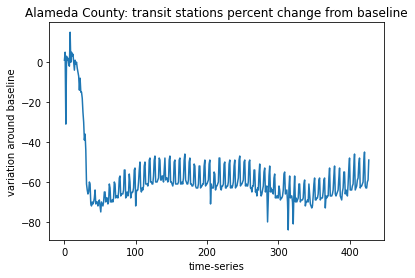

In [23]:
#looking for patterns of transit_stations_pecent_change in specific regions - Alameda County 
temp = Cal_transit_ttl.loc[Cal_transit_ttl['place_id']=='ChIJWRd5NDfyj4ARc30TGxHHxmg', :]
temp_time = range(len(temp))
county_name = temp['sub_region_2'][0]

sns.lineplot(temp_time, temp['transit_stations_percent_change_from_baseline'])
plt.title(f'{county_name}: transit stations percent change from baseline')
plt.xlabel('time-series')
plt.ylabel('variation around baseline');

c:\users\alex\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


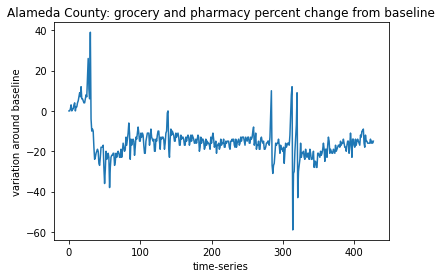

In [24]:
#looking for patterns of grocery_and_pharmacy_percent_change in specific regions - Alameda County 
#Pre-pandemic reaction - extreme concerns leading to high shopping rate 

sns.lineplot(temp_time, temp['grocery_and_pharmacy_percent_change_from_baseline'])
plt.title(f'{county_name}: grocery and pharmacy percent change from baseline')
plt.xlabel('time-series')
plt.ylabel('variation around baseline');

In [25]:
#the shopping frenzy before the lock-down order, which are only 3 days apart 
grocery_highest_date = temp.loc[temp['grocery_and_pharmacy_percent_change_from_baseline']==max(temp['grocery_and_pharmacy_percent_change_from_baseline']), 'date']
print('highest variation for pharmacy&grocery - date:', grocery_highest_date[0])
print('highest variation for pharmacy&grocery: ', max(temp['grocery_and_pharmacy_percent_change_from_baseline']))

highest variation for pharmacy&grocery - date: 2020/3/16
highest variation for pharmacy&grocery:  39.0


c:\users\alex\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


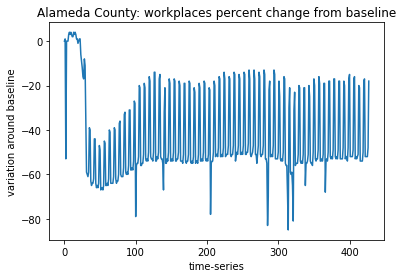

In [26]:
#looking for patterns of workplaces_percent_change in specific regions - Alameda County 


sns.lineplot(temp_time, temp['workplaces_percent_change_from_baseline'])
plt.title(f'{county_name}: workplaces percent change from baseline')
plt.xlabel('time-series')
plt.ylabel('variation around baseline');

c:\users\alex\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


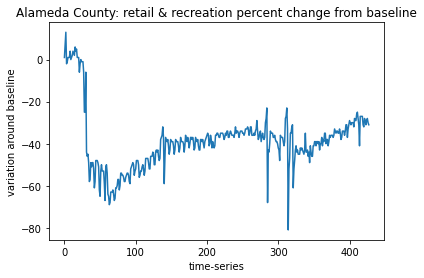

In [27]:
#looking for patterns of retail_and_recreation_percent_change in specific regions - Alameda County 

sns.lineplot(temp_time, temp['retail_and_recreation_percent_change_from_baseline'])
plt.title(f'{county_name}: retail & recreation percent change from baseline')
plt.xlabel('time-series')
plt.ylabel('variation around baseline');

c:\users\alex\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


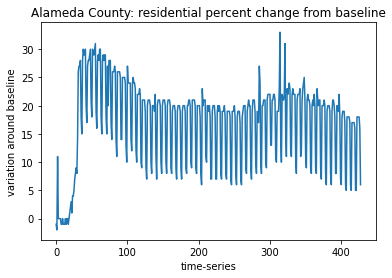

In [28]:
#looking for patterns of residential_percent_change in specific regions - Alameda County 

sns.lineplot(temp_time, temp['residential_percent_change_from_baseline'])
plt.title(f'{county_name}: residential percent change from baseline')
plt.xlabel('time-series')
plt.ylabel('variation around baseline');

In [29]:
#average change in residential 
np.mean(temp['residential_percent_change_from_baseline'])

17.156542056074766

c:\users\alex\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


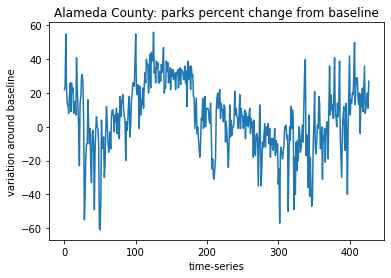

In [30]:
#looking for patterns of parks_percent_change in specific regions - Alameda County 

sns.lineplot(temp_time, temp['parks_percent_change_from_baseline'])
plt.title(f'{county_name}: parks percent change from baseline')
plt.xlabel('time-series')
plt.ylabel('variation around baseline');

US grocery&pharmacy sd: 14.883923839282033
US grocery$pharmacy mean: 0.08291078154987065


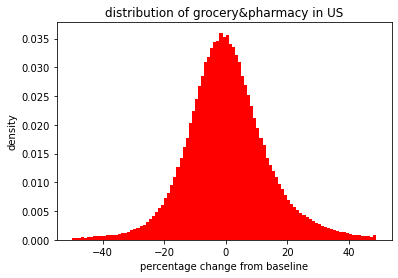

In [31]:
#US grocery&pharmacy percent change from baseline -> empirical distribution 
plt.hist(transit_ttl['grocery_and_pharmacy_percent_change_from_baseline'], bins = np.arange(-50, 50), color='r', density=True)
plt.title('distribution of grocery&pharmacy in US')
plt.xlabel('percentage change from baseline')
plt.ylabel('density');
#US grocery&pharmacy  -> H0: All states ~ N(0.0829, 14.88^2) with sample mean = 0.0829
print('US grocery&pharmacy sd:', np.std(df_us['grocery_and_pharmacy_percent_change_from_baseline']))
print('US grocery$pharmacy mean:',np.mean(df_us['grocery_and_pharmacy_percent_change_from_baseline']) )

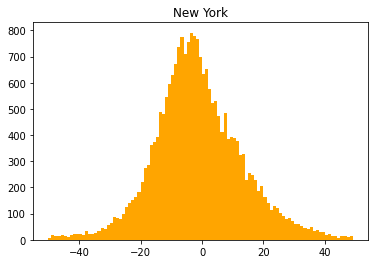

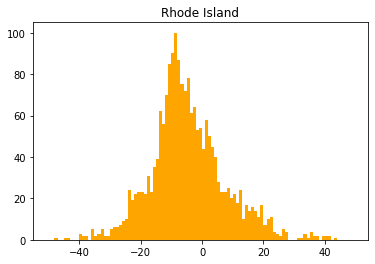

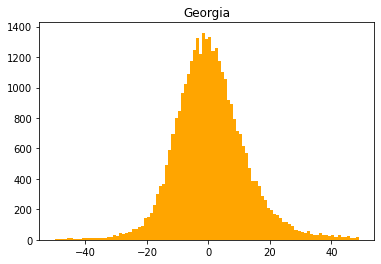

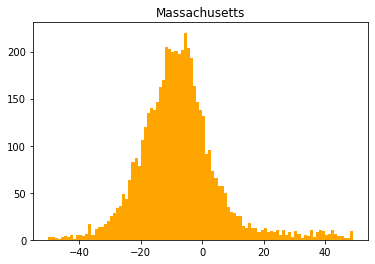

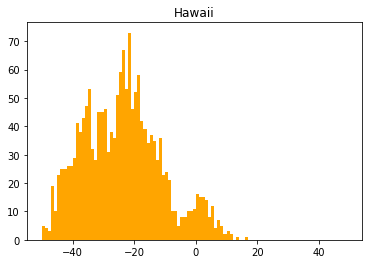

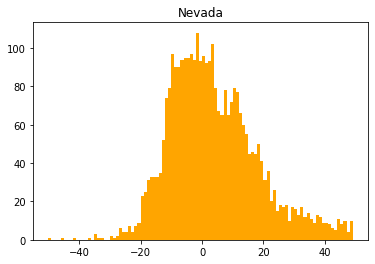

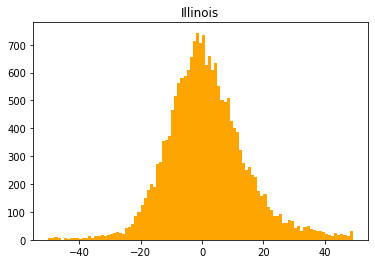

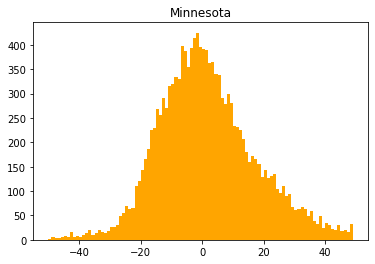

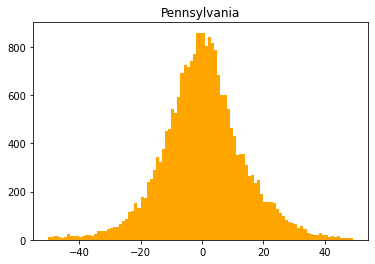

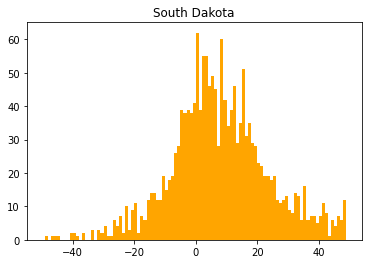

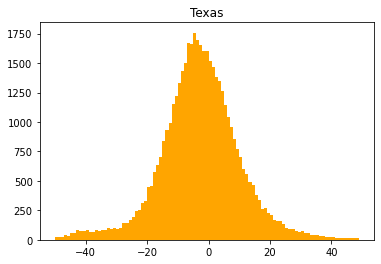

In [33]:
#plots of observational data for each state's percent change in visits to grocery&pharmacy stores
state_chosen=['New York','Rhode Island', 'Georgia', 'Massachusetts', 'Hawaii', 'Nevada'
              , 'Illinois', 'Minnesota', 'Pennsylvania','South Dakota', 'Texas']
for i in state_chosen:
    plt.figure()
    state_df = transit_ttl[transit_ttl['sub_region_1'] == i].dropna(subset=['sub_region_2']).drop(['metro_area', 'residential_percent_change_from_baseline', 'iso_3166_2_code'], axis = 1)
    plt.hist(state_df['grocery_and_pharmacy_percent_change_from_baseline'], bins = np.arange(-50, 50), color='orange');
    plt.title(i)

### Q1. Multiple Hypothesis Testing 

Question: Is the economy in March 2020, when the pandemic first started, worse than the rest of the year 2020?

H0s: The economy on date 2020/3/x is not different than that of the rest of the date in the year 2020. (i.e. The pandemic does not immediately influence the economy)

H1s: The economy on date 2020/3/x is worse than other dates in the year 2020.

In [34]:
workplace_2020_march = transit_2020.iloc[15:46, :][['date', 'workplaces_percent_change_from_baseline']]

In [35]:
bootstrap2020_3 = np.random.choice(transit_2020['workplaces_percent_change_from_baseline'], size = 10000)

(array([  48.,   72.,  169.,  606., 1690., 3134., 2507., 1113.,  365.,
          15.]),
 array([-88. , -76.7, -65.4, -54.1, -42.8, -31.5, -20.2,  -8.9,   2.4,
         13.7,  25. ]),
 <BarContainer object of 10 artists>)

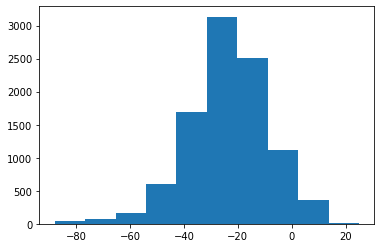

In [36]:
plt.hist(bootstrap2020_3)

In [37]:
workplace_2020_lst = workplace_2020_march['workplaces_percent_change_from_baseline']

In [38]:
p_vals = np.sort(np.array([np.count_nonzero(i <= bootstrap2020_3) / 10000 for i in workplace_2020_lst]))

In [39]:
p_vals

array([0.0192, 0.038 , 0.038 , 0.038 , 0.038 , 0.052 , 0.052 , 0.052 ,
       0.0762, 0.0857, 0.0857, 0.0935, 0.1019, 0.1374, 0.1374, 0.4   ,
       0.5158, 0.6078, 0.7134, 0.7134, 0.7562, 0.7779, 0.8118, 0.8401,
       0.8734, 0.9042, 0.9113, 0.9113, 0.9155, 0.9206, 0.9259])

(array([13.,  2.,  0.,  0.,  1.,  1.,  1.,  2.,  3.,  8.]),
 array([0.0192 , 0.10987, 0.20054, 0.29121, 0.38188, 0.47255, 0.56322,
        0.65389, 0.74456, 0.83523, 0.9259 ]),
 <BarContainer object of 10 artists>)

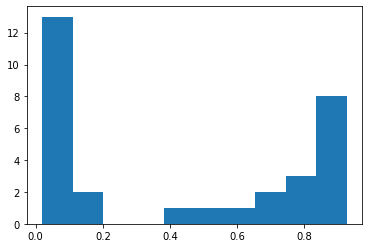

In [40]:
plt.hist(p_vals)

In [41]:
def benjamini_hochberg(p_values, alpha):
    """
    Returns decisions on p-values using Benjamini-Hochberg.
    
    Inputs:
        p_values: array of p-values
        alpha: desired FDR (FDR = E[# false positives / # positives])
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """
    new_p_values = np.sort(p_values)
    bh_values = np.array([])
    sig_p = 0;
    for i in range(len(p_values)):
        bh_values = np.append(bh_values, (i+1) * alpha / len(p_values))
    for j in range(len(p_values)):
        if (new_p_values[j] < bh_values[j]):
            sig_p = new_p_values[j]
    decisions = p_values <= sig_p
    return decisions

In [42]:
benjamini_hochberg(p_vals, 0.1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [43]:
def bonferroni(p_values, alpha_total):
    """
    Returns decisions on p-values using the Bonferroni correction.
    
    Inputs:
        p_values: array of p-values
        alpha_total: desired family-wise error rate (FWER = P(at least one false discovery))
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """

    decisions = p_values < (alpha_total/len(p_values))
    return decisions

In [44]:
bonferroni(p_vals, 0.1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

### Q2. Bayesian Inference

In [145]:
#this function collects 
def mean_all_states():
    '''
    This function collects the observational means and standard deviations of each states 
    '''
    mean_collect = []
    sd_collect=[]
    for j in state_holder:
        mean_collect.append(np.mean(state_holder[j]['grocery_and_pharmacy_percent_change_from_baseline']))
        sd_collect.append(np.std(state_holder[j]['grocery_and_pharmacy_percent_change_from_baseline']))
    return mean_collect, sd_collect
all_mean, all_sd = mean_all_states()

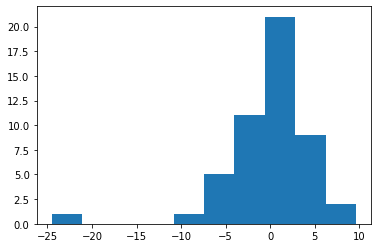

In [146]:
#assume prior ~ N(-0.0858, 5.14^2)
plt.hist(all_mean);

mean of all empirical sd: 14.934974255520816


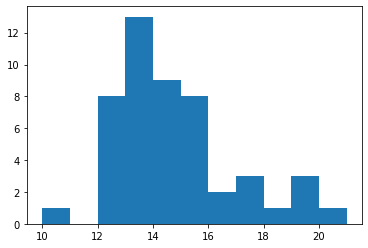

In [234]:
# the observational standard deviation 
plt.hist(all_sd, bins=np.arange(10,22));
print('mean of all empirical sd:', np.mean(all_sd))

In [75]:
import pymc3 as pm

In [155]:
def approximate_inference_MCMC(prior_mu, prior_sd, study_df):
    """
    Creates and generates samples from a PyMC3 model of
    the posterior distribution using Markov Chain Monte Carlo (MCMC)
    
    Outputs: (model, trace)
        model is a PyMC3 model object, which represents the graphical model
        trace is a PyMC3 trace object, which represents 400 samples
            of everything from the posterior
    """

    with pm.Model() as model:

        mu = pm.Normal(
            'mu', mu=prior_mu, sigma=prior_sd)
        
        #we assume the sd is 15, which is the mean of the observaational sd. 
        obs = pm.Normal(
            'obs', mu=mu, sigma=15, 
            observed=study_df['grocery_and_pharmacy_percent_change_from_baseline']
        ) 
        

        trace = pm.sample(200, target_accept=0.80)
    
    return (model, trace)

In [156]:
#the run of MCMC model with region = California
MCMC_Cal, trace = approximate_inference_MCMC(-0.0858, 5.14, df_us.loc[df_us['sub_region_1']=='California',:])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [obs_missing, mu]


Sampling 2 chains for 1_000 tune and 200 draw iterations (2_000 + 400 draws total) took 27422 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.


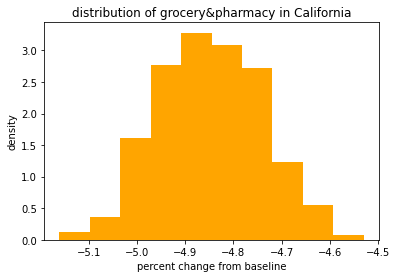

In [223]:
#distribution of the posterior samples for California
trace_mu = trace['mu']

plt.hist(trace_mu, density=True, color='orange')
plt.title('distribution of grocery&pharmacy in California')
plt.xlabel('percent change from baseline')
plt.ylabel('density');

In [ ]:
#states chosen to use as an example due to long run time 
state_chosen=['Rhode Island', 'Georgia', 'Massachusetts', 'Hawaii', 'Nevada'
              , 'Illinois', 'Minnesota', 'Pennsylvania','South Dakota', 'Texas']


def MCMC_all_states(prior_mean=-0.0858,prior_sd=5.14, state_list = state_chosen):
    '''
    compute the posterior distribution of each state in 'state_list'; 
    auto-saving the trace and return a dictionary that collects all the posterior samples 
    mcmc_collect: a dictionary that collects all the posterior samples; keys are state names.
    '''
    mcmc_collect={}
    for i in state_chosen:
        MCMC_, curr_trace = approximate_inference_MCMC(prior_mean, prior_sd, df_us.loc[df_us['sub_region_1']==i,:])
        mcmc_collect[i] = curr_trace
        
        pm.save_trace(f'../{i}.trace')
        
    return mcmc_collect



### transportation data EDA - Irrelavent to the project! 

##### the following EDA is not relavent to the final project report 


In [36]:
print(monthly_us.columns.tolist())

['Index', 'Date', 'Air Safety - General Aviation Fatalities', 'Highway Fatalities Per 100 Million Vehicle Miles Traveled', 'Highway Fatalities', 'U.S. Airline Traffic - Total - Seasonally Adjusted', 'U.S. Airline Traffic - International - Seasonally Adjusted', 'U.S. Airline Traffic - Domestic - Seasonally Adjusted', 'Transit Ridership - Other Transit Modes - Adjusted', 'Transit Ridership - Fixed Route Bus - Adjusted', 'Transit Ridership - Urban Rail - Adjusted', 'Freight Rail Intermodal Units', 'Freight Rail Carloads', 'Highway Vehicle Miles Traveled - All Systems', 'Highway Vehicle Miles Traveled - Total Rural', 'Highway Vehicle Miles Traveled - Other Rural', 'Highway Vehicle Miles Traveled - Rural Other Arterial', 'Highway Vehicle Miles Traveled - Rural Interstate', 'State and Local Government Construction Spending - Breakwater/Jetty', 'State and Local Government Construction Spending - Dam/Levee', 'State and Local Government Construction Spending - Conservation and Development', 'St

In [37]:
def interpolation(arr):
    nan = np.nan
    ok = -np.isnan(arr)
    xp = ok.ravel().nonzero()[0]
    fp = arr[-np.isnan(arr)]
    x  = np.isnan(arr).ravel().nonzero()[0]
    arr[np.isnan(arr)] = np.interp(x, xp, fp)
    
gov_spending = monthly_us[['Date', 'State and Local Government Construction Spending - Dock / Marina', 
'State and Local Government Construction Spending - Mass Transit',
'State and Local Government Construction Spending - Land Passenger Terminal',
'State and Local Government Construction Spending - Air Passenger Terminal',
'State and Local Government Construction Spending - Transportation',
'State and Local Government Construction Spending - Automotive']].iloc[756:890 , :]

In [38]:
personal_spending = monthly_us[['Date', 'Personal Spending on Transportation - Transportation Services - Seasonally Adjusted',
'Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted',
'Personal Spending on Transportation - Motor Vehicles and Parts - Seasonally Adjusted']].iloc[756:890 , :]

In [39]:
employment = monthly_us[['Date','Transportation Employment - Water Transportation', 
'Transportation Employment - Rail Transportation', 
'Transportation Employment - Air Transportation',
'Transportation Employment - Transit and ground passenger transportation', 
'Transportation Employment - Truck Transportation']].iloc[756:890, :]

#### government spending

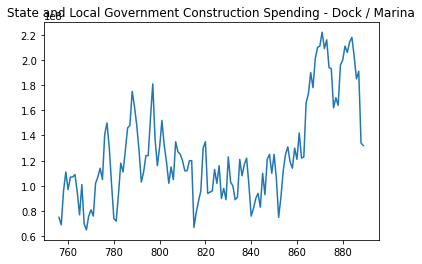

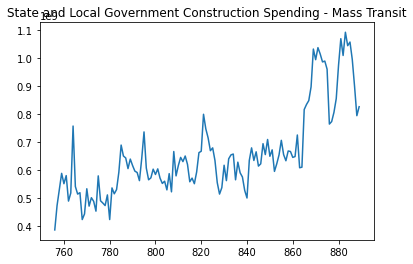

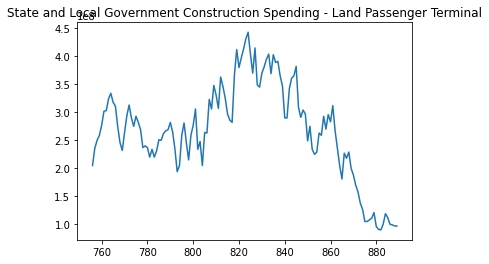

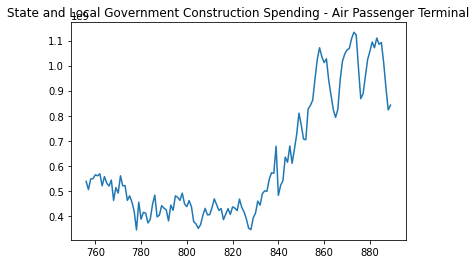

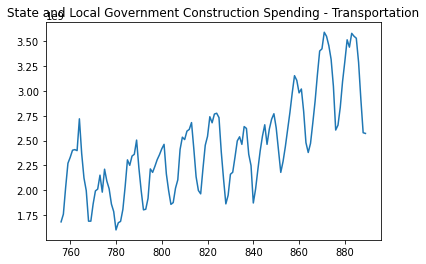

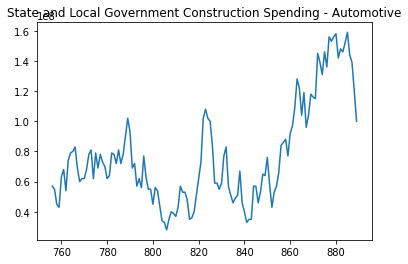

In [40]:
for i in gov_spending.columns[1:]:
    plt.figure()
    plt.plot(gov_spending[i])
    plt.title(f'{i}')

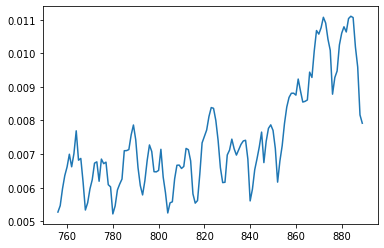

In [41]:
government_norm  = gov_spending.iloc[:, 1:].div(gov_spending.sum(axis=0), axis=1)

government_norm
government_arr = np.sum(government_norm, axis = 1)/6
plt.plot(government_arr)

#### personal spending

In [42]:
trans_service = personal_spending['Personal Spending on Transportation - Transportation Services - Seasonally Adjusted']
interpolation(trans_service)
gasoline = personal_spending['Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted']
interpolation(gasoline)
motor = personal_spending['Personal Spending on Transportation - Motor Vehicles and Parts - Seasonally Adjusted']
interpolation(motor)

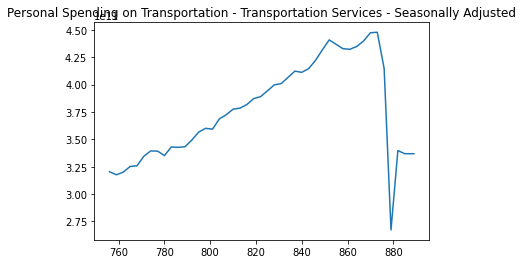

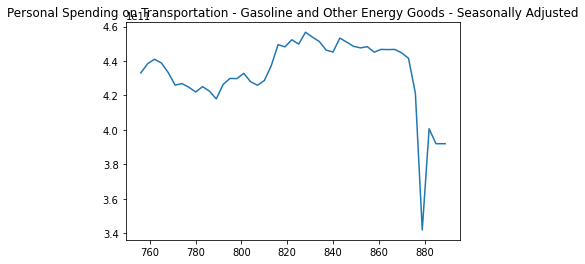

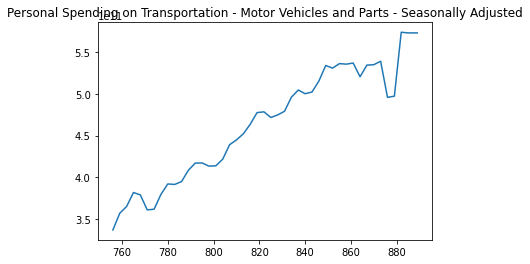

In [43]:
for i in personal_spending.columns[1:]:
    plt.figure()
    plt.plot(personal_spending[i])
    plt.title(f'{i}')

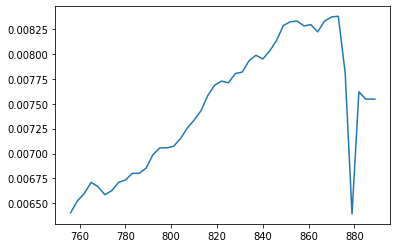

In [44]:
personal_spending_norm = personal_spending.iloc[:, 1:].div(personal_spending.sum(axis=0), axis=1)[['Personal Spending on Transportation - Transportation Services - Seasonally Adjusted',
'Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted',
'Personal Spending on Transportation - Motor Vehicles and Parts - Seasonally Adjusted']]
personal_spending_sum = np.sum(personal_spending_norm, axis = 1)/3
plt.plot(personal_spending_sum)

#### Transportation Employment

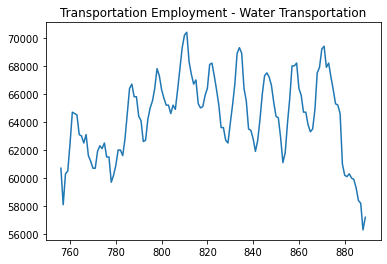

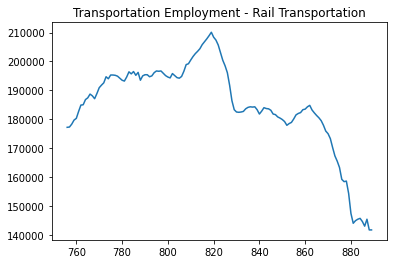

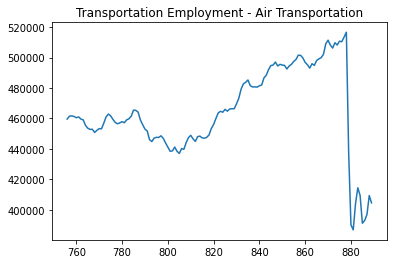

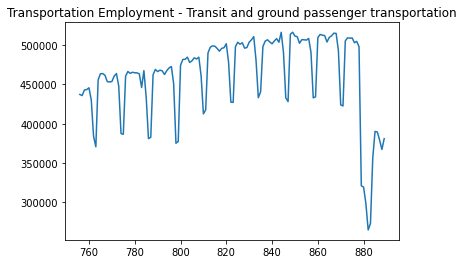

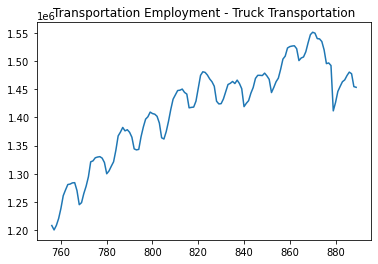

In [45]:
index = 1
for i in employment.columns[1:]:
    plt.figure()
    plt.plot(np.arange(756,890), employment[i])
    plt.title(f'{i}')
    index+=1

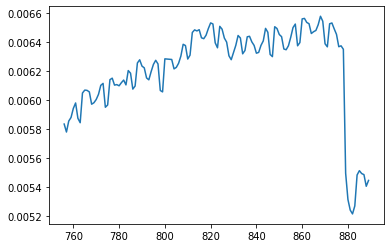

In [46]:
employment_norm = employment.iloc[:, 1:].div(employment.sum(axis=0), axis=1)
employment_sum = np.sum(employment_norm, axis = 1)/len(employment_norm.columns)

plt.plot(employment_sum);

In [48]:
#gov_arr = government_sum.tolist()
ps_arr = personal_spending_sum.tolist()
employment_arr = employment_sum.tolist()

#### GDP vs employment

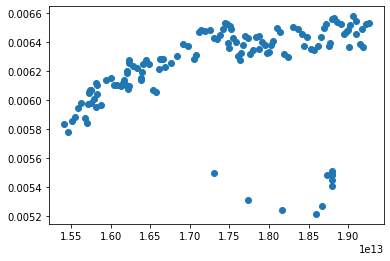

In [49]:
GDP = monthly_us[['Date', 'Real Gross Domestic Product - Seasonally Adjusted']].iloc[756:890, :]
interpolation(GDP['Real Gross Domestic Product - Seasonally Adjusted'])
GDP_arr = np.sum(GDP, axis = 1)
plt.scatter(GDP_arr, employment_arr);

In [50]:
fuel = monthly_us[['Highway Fuel Price - Regular Gasoline'
                   ,'Highway Fuel Price - On-highway Diesel'
                   ,'Highway Vehicle Miles Traveled - All Systems'
                   , 'Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted'
                   , 'Personal Spending on Transportation - Motor Vehicles and Parts - Seasonally Adjusted']]

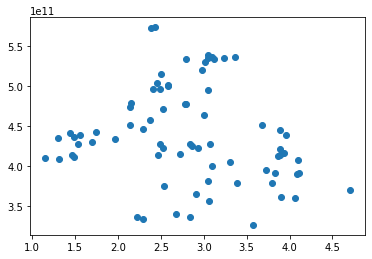

In [51]:
fuel_price_miles = fuel.loc[(fuel['Highway Fuel Price - Regular Gasoline'].isna()==False) & (fuel['Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted'].isna()==False), :]
plt.scatter(fuel['Highway Fuel Price - On-highway Diesel'], fuel['Personal Spending on Transportation - Motor Vehicles and Parts - Seasonally Adjusted']);